### Rana scatterplot

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import textwrap
import os
from sklearn.metrics import r2_score

In [2]:
import glob
all_f= glob.glob('Test+Pre*.csv')
all_f
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df)
all_f

['Test+Pred_Daily_Sunspot_data-All_models_Result.csv',
 'Test+Pred_Healthy_control_heart_data-All_models_Result.csv',
 'Test+Pred_Metro_Interstate_Traffic_Volume_PD-All_models_Result.csv',
 'Test+Pred_Myocardial_infarction_heart_data-All_models_Result.csv',
 'Test+Pred_PM2.5_p09_data-All_models_Result.csv',
 'Test+Pred_POWER_Point_Daily_Presure_Data-All_models_Result.csv',
 'Test+Pred_POWER_Point_Daily_Temperature_Data-All_models_Result.csv',
 'Test+Pred_Tetuan_City_Power_Consumption_Zone1_processed-All_models_Result.csv']

In [3]:
li[0]

,Unnamed: 0,Test,LSTM-Tred_Pred,LSTM-GAB_Pred,CNN-Tred_Pred,CNN-GAB_Pred,BiLSTM-Tred_Pred,BiLSTM-GAB_Pred,GRU-Tred_Pred,GRU-GAB_Pred,RNN-Tred_Pred,RNN-GAB_Pred
0,0,291.0,230.313385,255.966437,233.638214,235.288458,233.389008,254.456781,238.256210,242.198346,242.312836,244.323399
1,1,284.0,309.078857,322.788381,307.180511,293.658200,296.258484,342.575987,308.424683,321.390138,311.717621,317.376033
2,2,319.0,299.443054,294.869075,305.604553,291.930943,298.943970,302.041895,302.142456,295.456283,303.230164,285.517655
3,3,364.0,322.494019,322.964144,331.830566,317.366395,329.523804,323.804039,325.014587,325.767429,331.059998,329.901857
4,4,340.0,375.635162,366.149889,375.881287,352.241476,364.472321,365.329900,371.740295,380.935385,379.896057,372.887667
...,...,...,...,...,...,...,...,...,...,...,...,...
14973,14973,84.0,108.567627,107.355693,109.549316,98.411802,115.207993,110.954468,113.484009,102.576743,115.486160,106.802115
14974,14974,84.0,85.980049,79.099776,84.455849,81.725956,92.213715,86.709842,88.110680,81.789332,88.306213,80.852942
14975,14975,77.0,86.211266,87.925219,83.363495,78.605664,89.323730,86.005192,89.392380,88.298647,85.773468,80.085770
14976,14976,75.0,80.417221,82.025664,79.958000,78.253817,85.841171,81.152689,83.833305,82.497965,80.056404,76.865836


In [4]:
li[0].iloc[:,-11:].iloc[:,2:3]

,LSTM-GAB_Pred
0,255.966437
1,322.788381
2,294.869075
3,322.964144
4,366.149889
...,...
14973,107.355693
14974,79.099776
14975,87.925219
14976,82.025664


In [5]:
ra=pd.read_csv('rana/Rana.csv')
ra=ra.iloc[:,1:]
ra

,Test,BiLSTM_Tred,BiLSTM_Shift,Gru_Tred,Gru_Shift,LSTM_Tred,LSTM_Shift,RNN_Tred,RNN_Shift
0,18.012917,17.726976,17.793964,17.720507,17.738667,17.758434,17.962112,17.553060,17.525501
1,17.508750,17.391813,17.423597,17.356745,17.362255,17.577670,17.508299,17.312520,17.373817
2,18.121250,18.088713,18.084736,18.064245,18.074488,18.147060,18.037477,17.927683,18.049206
3,18.792500,18.606722,18.630375,18.560005,18.612562,18.710010,18.577026,18.511290,18.626270
4,19.905000,19.669031,19.670380,19.586525,19.708809,19.816800,19.590944,19.654165,19.870388
...,...,...,...,...,...,...,...,...,...
1590,22.525833,23.203520,23.154339,22.730713,23.101978,23.562925,23.461990,22.969526,22.953432
1591,24.331250,24.403389,24.411260,23.729952,24.098726,24.876055,24.691511,24.126017,24.228935
1592,26.252917,26.272850,26.341562,25.311506,25.903600,26.633846,26.537630,26.154497,26.139038
1593,25.191250,24.653671,24.664858,23.837149,24.384457,25.524490,25.400066,24.310715,24.284199


C:\Users\vp123\AppData\Local\Temp\ipykernel_13632\2001039732.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.8) # Add space for legend


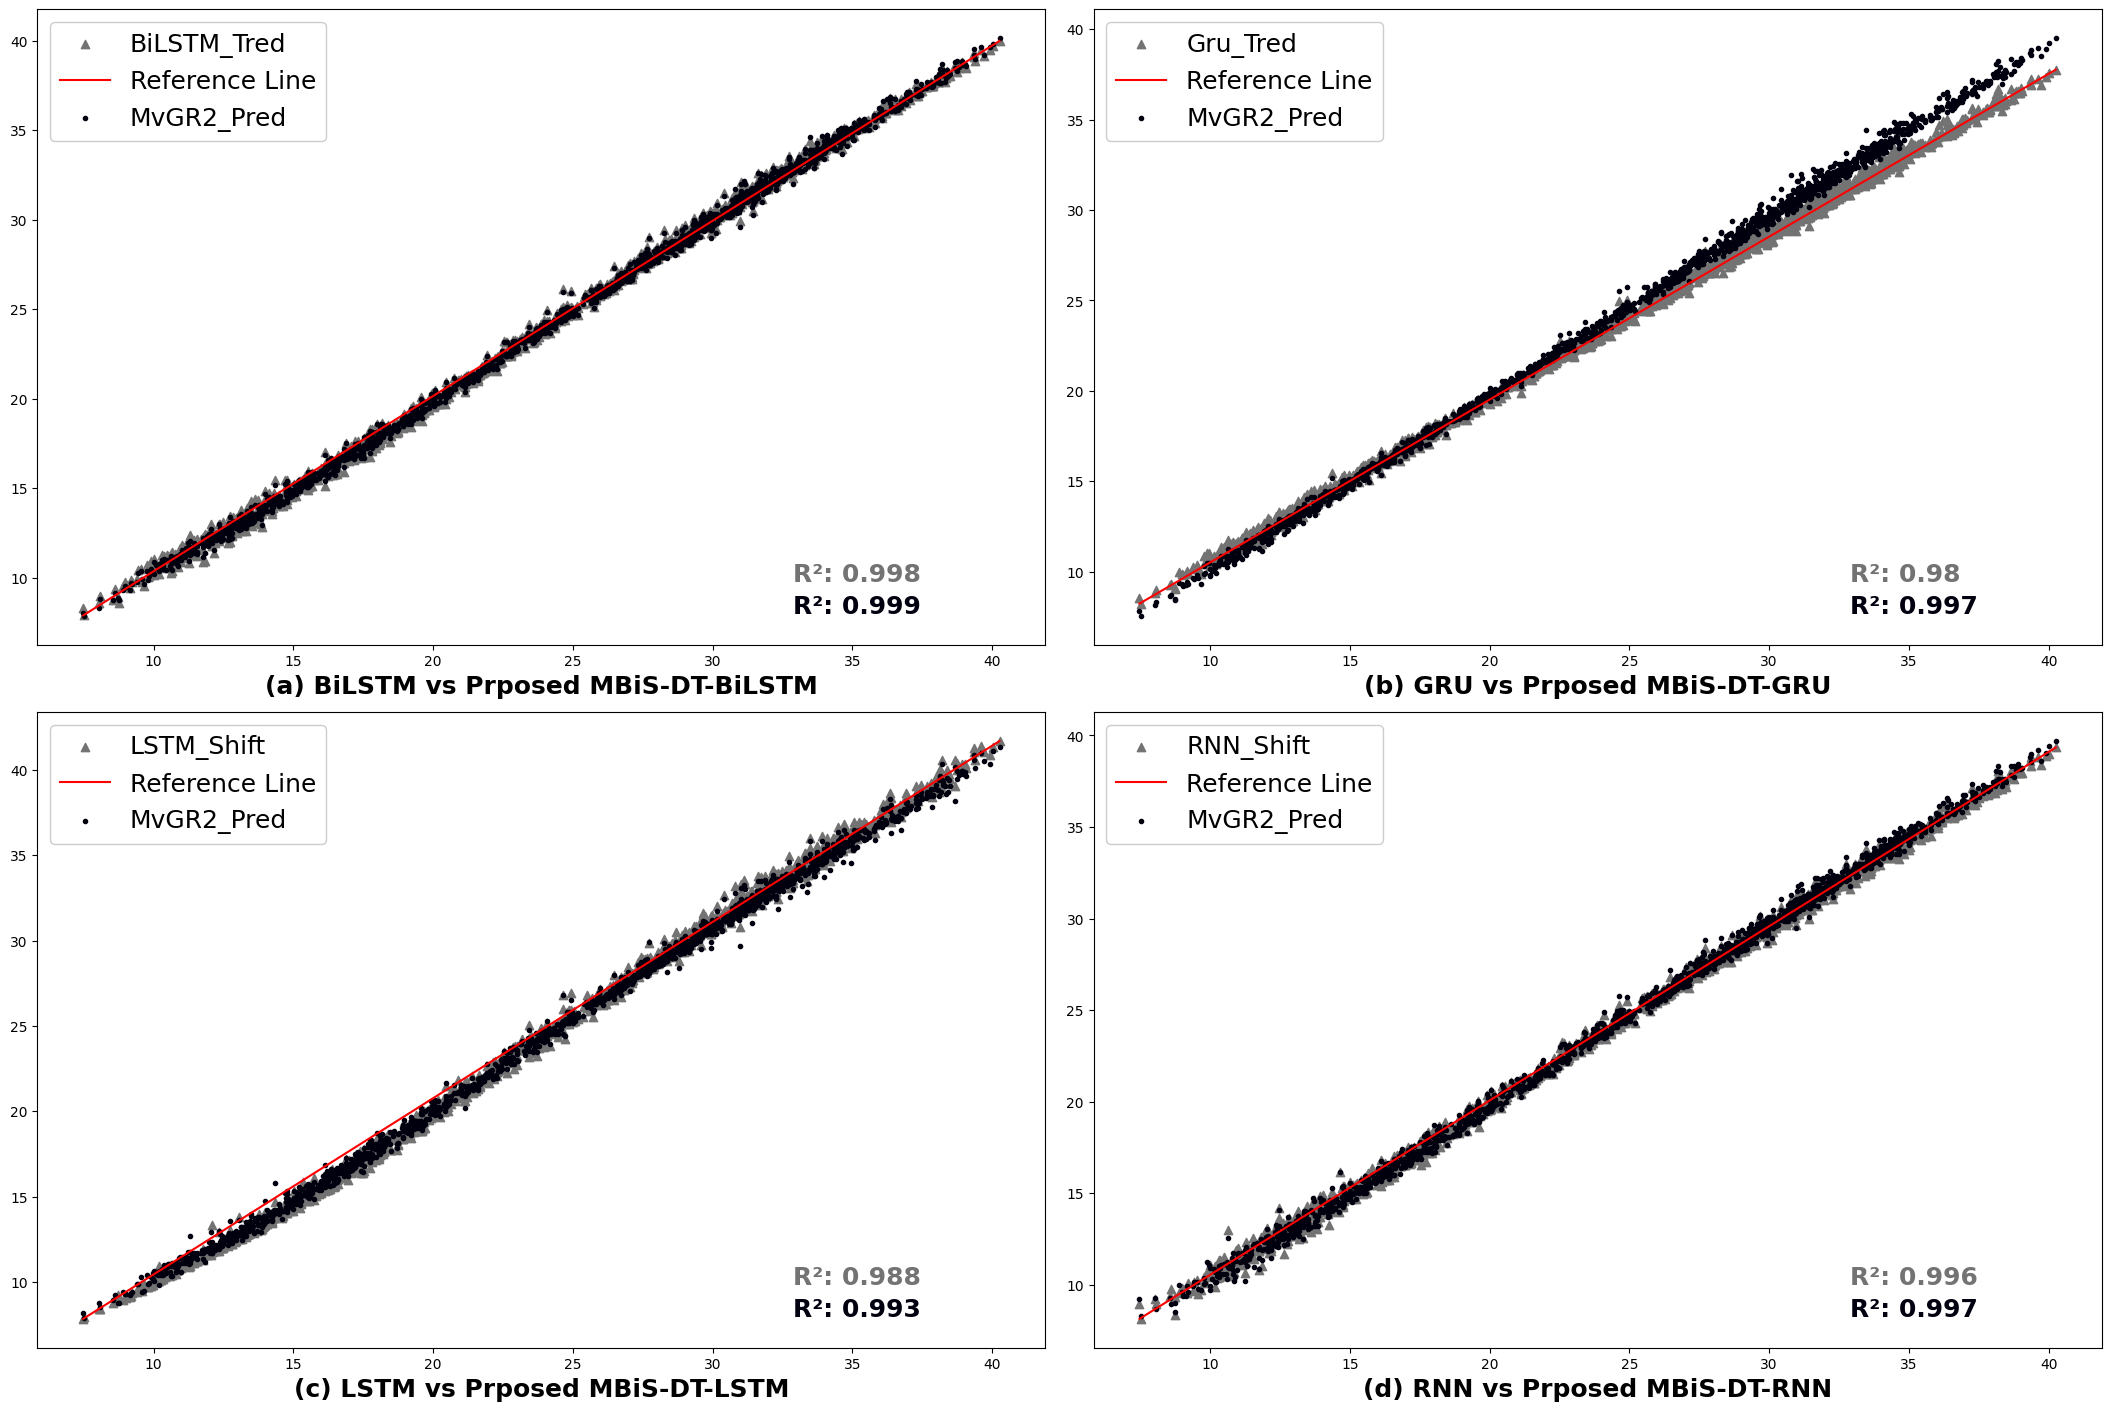

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(21, 14), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
handles, labels = None, None # Initialize handles and labels

test=ra.iloc[:,0:1] # test colume
r=0
axs[r,0].scatter(test,ra.iloc[:,1:2],color= "#737373",marker='^',label=ra.iloc[:,1:2].columns[0]) #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,0].plot([test.min(),test.max()],[ra.iloc[:,1:2].min(),ra.iloc[:,1:2].max()],color='red',label='Reference Line')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 1:2]), 3).astype(np.float64)}", xy=(0.75, 0.1), xycoords='axes fraction', fontsize=18 ,color= "#737373",weight='bold')

axs[r,0].scatter(test,ra.iloc[:,2:3],color= "#00000F",marker='.',label='MvGR2_Pred') #ra.iloc[:,-11:].iloc[:,2:3] (LSTM-GAB_Pred)
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 2:3]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,color= "#00000F",weight='bold')
axs[r, 0].set_xlabel('(a) BiLSTM vs Prposed MBiS-DT-BiLSTM', fontsize=18, weight='bold')

axs[r,1].scatter(test,ra.iloc[:,3:4],color= "#737373",marker='^',label=ra.iloc[:,3:4].columns[0]) #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,1].plot([test.min(),test.max()],[ra.iloc[:,3:4].min(),ra.iloc[:,3:4].max()],color='red',label='Reference Line')
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,1].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 3:4]), 3).astype(np.float64)}", xy=(0.75, 0.1), xycoords='axes fraction', fontsize=18 ,color= "#737373",weight='bold')

axs[r,1].scatter(test,ra.iloc[:,4:5],color= "#00000F",marker='.',label='MvGR2_Pred') #ra.iloc[:,-11:].iloc[:,2:3] (LSTM-GAB_Pred)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 1].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 4:5]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,color= "#00000F",weight='bold')
axs[r, 1].set_xlabel('(b) GRU vs Prposed MBiS-DT-GRU', fontsize=18, weight='bold')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18)

r=1
axs[r,0].scatter(test,ra.iloc[:,6:7],color= "#737373",marker='^',label=ra.iloc[:,6:7].columns[0]) #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,0].plot([test.min(),test.max()],[ra.iloc[:,6:7].min(),ra.iloc[:,6:7].max()],color='red',label='Reference Line')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 6:7]), 3).astype(np.float64)}", xy=(0.75, 0.1), xycoords='axes fraction', fontsize=18 ,color= "#737373",weight='bold')

axs[r,0].scatter(test,ra.iloc[:,5:6],color= "#00000F",marker='.',label='MvGR2_Pred') #ra.iloc[:,-11:].iloc[:,2:3] (LSTM-GAB_Pred)
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 5:6]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,color= "#00000F",weight='bold')
axs[r, 0].set_xlabel('(c) LSTM vs Prposed MBiS-DT-LSTM', fontsize=18, weight='bold')

axs[r,1].scatter(test,ra.iloc[:,8:9],color= "#737373",marker='^',label=ra.iloc[:,8:9].columns[0]) #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,1].plot([test.min(),test.max()],[ra.iloc[:,8:9].min(),ra.iloc[:,8:9].max()],color='red',label='Reference Line')
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,1].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 8:9]), 3).astype(np.float64)}", xy=(0.75, 0.1), xycoords='axes fraction', fontsize=18 ,color= "#737373",weight='bold')

axs[r,1].scatter(test,ra.iloc[:,7:8],color= "#00000F",marker='.',label='MvGR2_Pred') #ra.iloc[:,-11:].iloc[:,2:3] (LSTM-GAB_Pred)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 1].annotate(f"R\u00b2: {np.round(r2_score(test,ra.iloc[:, 7:8]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,color= "#00000F",weight='bold')
axs[r, 1].set_xlabel('(d) RNN vs Prposed MBiS-DT-RNN', fontsize=18, weight='bold')

axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18)
plt.savefig('rana/scatter plot',dpi=400,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')

In [8]:
ra=pd.read_csv('rana/Rana.csv')
ra=ra.iloc[380:420,1:]
ra

,Test,BiLSTM_Tred,BiLSTM_Shift,Gru_Tred,Gru_Shift,LSTM_Tred,LSTM_Shift,RNN_Tred,RNN_Shift
380,17.151250,16.548635,16.625408,16.835743,16.789669,16.664568,16.575382,16.552341,16.569214
381,15.477917,14.994806,15.076937,15.262135,15.122862,15.054304,15.086590,15.026533,14.975355
382,15.880000,15.873490,15.822662,16.092730,15.948438,15.599778,15.382667,15.836002,16.006618
383,16.453750,16.184875,16.268650,16.482273,16.358112,15.861759,15.808818,16.159729,16.361061
384,15.521667,15.049866,15.213034,15.371980,15.229326,14.972281,14.960171,15.111111,15.110337
385,15.180417,14.927165,15.012791,15.278635,15.105038,14.807108,14.701658,14.999919,15.178156
386,13.768750,13.443760,13.606747,13.805698,13.531822,13.311238,13.460858,13.450607,13.763369
387,13.009583,13.006335,13.054791,13.325463,13.011508,12.886564,12.764294,12.900982,13.169366
388,11.312083,11.239410,11.393939,11.609204,11.172871,11.141108,11.353277,11.032716,11.605626
389,10.696250,11.087553,11.047601,11.306148,10.838684,10.945314,10.731756,10.933636,11.126513


C:\Users\vp123\AppData\Local\Temp\ipykernel_13632\1096315381.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.8) # Add space for legend


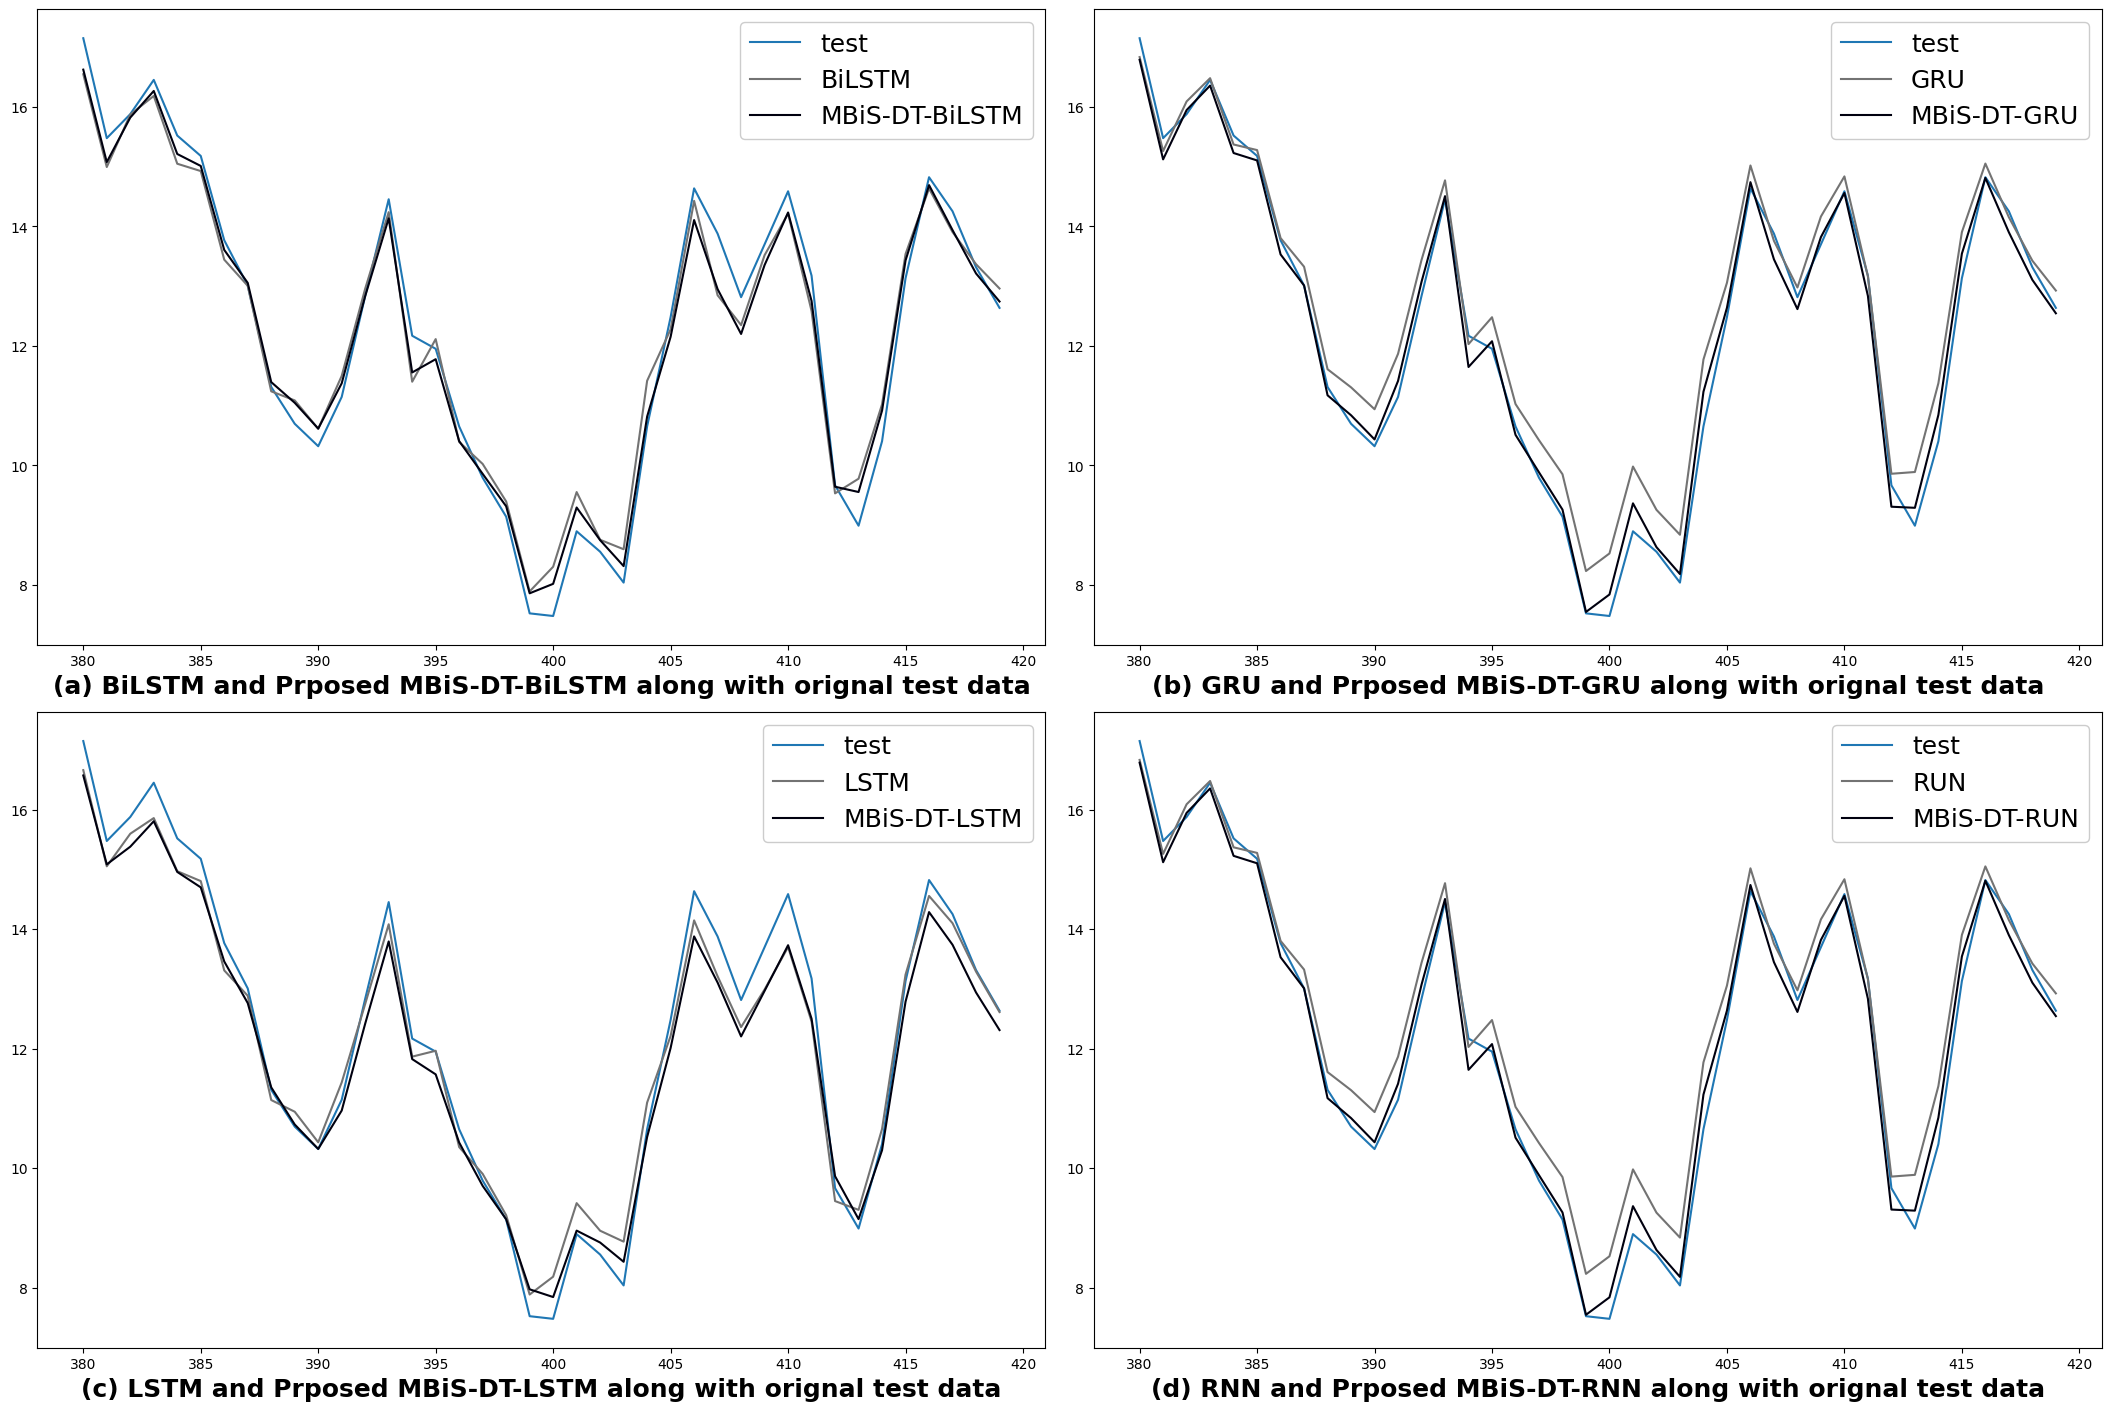

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(21, 14), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
handles, labels = None, None # Initialize handles and labels

test=ra.iloc[:,0:1] # test colume
r=0

axs[r,0].plot(test,label='test')
axs[r,0].plot(ra.iloc[:,1:2],color= "#737373",label='BiLSTM') #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,0].plot(ra.iloc[:,2:3],color= "#00000F",label='MBiS-DT-BiLSTM')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)


axs[r,1].plot(test,label='test')
axs[r,1].plot(ra.iloc[:,3:4],color= "#737373",label='GRU') #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,1].plot(ra.iloc[:,4:5],color= "#00000F",label='MBiS-DT-GRU')
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)

axs[r, 0].set_xlabel('(a) BiLSTM and Prposed MBiS-DT-BiLSTM along with orignal test data', fontsize=18, weight='bold')
axs[r, 1].set_xlabel('(b) GRU and Prposed MBiS-DT-GRU along with orignal test data', fontsize=18, weight='bold')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18)

r=1

axs[r,0].plot(test,label='test')
axs[r,0].plot(ra.iloc[:,5:6],color= "#737373",label='LSTM') #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,0].plot(ra.iloc[:,6:7],color= "#00000F",label='MBiS-DT-LSTM')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)


axs[r,1].plot(test,label='test')
axs[r,1].plot(ra.iloc[:,3:4],color= "#737373",label='RUN') #ra.iloc[:,-11:].iloc[:,1:2](LSTM-Tred_Pred)
axs[r,1].plot(ra.iloc[:,4:5],color= "#00000F",label='MBiS-DT-RUN')
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)

axs[r, 0].set_xlabel('(c) LSTM and Prposed MBiS-DT-LSTM along with orignal test data', fontsize=18, weight='bold')
axs[r, 1].set_xlabel('(d) RNN and Prposed MBiS-DT-RNN along with orignal test data', fontsize=18, weight='bold')
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18)
plt.savefig('rana/40_datapont-plot',dpi=600,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')

In [ ]:
v=all_f[0].split(r"Pred_")
v_n=v[1]
D=v_n.split(r"-")[0].split("_data")
D_n=D[0]
D_n

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(21, 14), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
handles, labels = None, None # Initialize handles and labels
#axs[0,0].scatter(li[0].iloc[:,-11:].iloc[:n,0:1],label=ra.iloc[:,-11:].iloc[:n,0:1].columns[0])
d=0
test=li[d].iloc[:,-11:].iloc[:,0:1]
r=0
axs[r,0].scatter(test,li[d].iloc[:,-11:].iloc[:,1:2],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,1:2].columns[0])
axs[r,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,1:2].min(),li[d].iloc[:,-11:].iloc[:,1:2].max()],color='red',label='Reference Line')
axs[r,0].spines['top'].set_color('red')
axs[r,0].spines['top'].set_linewidth(3)
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18,fontsize=18,fontsize=18,fontsize=18,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 1:2]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,0].scatter(test,li[d].iloc[:,-11:].iloc[:,2:3],color= "#737373",label='MvGR2_Pred')
axs[r+1,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,2:3].min(),li[d].iloc[:,-11:].iloc[:,2:3].max()],color='black',label='Reference Line')
axs[r+1,0].spines['top'].set_color('green')
axs[r+1,0].spines['top'].set_linewidth(3)
axs[r+1,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 2:3]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,1].scatter(test,li[d].iloc[:,-11:].iloc[:,3:4],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,3:4].columns[0])
axs[r,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,3:4].min(),li[d].iloc[:,-11:].iloc[:,3:4].max()],color='red',label='Reference Line')
axs[r,1].spines['top'].set_color('red')
axs[r,1].spines['top'].set_linewidth(3)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 3:4]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,1].scatter(test,li[d].iloc[:,-11:].iloc[:,4:5],color= "#737373",label='MvGR2_Pred')
axs[r+1,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,4:5].min(),li[d].iloc[:,-11:].iloc[:,4:5].max()],color='black',label='Reference Line')
axs[r+1,1].spines['top'].set_color('green')
axs[r+1,1].spines['top'].set_linewidth(3)
axs[r+1,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 4:5]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,2].scatter(test,li[d].iloc[:,-11:].iloc[:,5:6],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,5:6].columns[0])
axs[r,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,5:6].min(),li[d].iloc[:,-11:].iloc[:,5:6].max()],color='red',label='Reference Line')
axs[r,2].spines['top'].set_color('red')
axs[r,2].spines['top'].set_linewidth(3)
axs[r,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 5:6]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,2].scatter(test,li[d].iloc[:,-11:].iloc[:,6:7],color= "#737373",label='MvGR2_Pred')
axs[r+1,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,6:7].min(),li[d].iloc[:,-11:].iloc[:,6:7].max()],color='black',label='Reference Line')
axs[r+1,2].spines['top'].set_color('green')
axs[r+1,2].spines['top'].set_linewidth(3)
axs[r+1,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 6:7]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,3].scatter(test,li[d].iloc[:,-11:].iloc[:,7:8],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,7:8].columns[0])
axs[r,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,7:8].min(),li[d].iloc[:,-11:].iloc[:,7:8].max()],color='red',label='Reference Line')
axs[r,3].spines['top'].set_color('red')
axs[r,3].spines['top'].set_linewidth(3)
axs[r,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 7:8]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,3].scatter(test,li[d].iloc[:,-11:].iloc[:,8:9],color= "#737373",label='MvGR2_Pred')
axs[r+1,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,8:9].min(),li[d].iloc[:,-11:].iloc[:,8:9].max()],color='black',label='Reference Line')
axs[r+1,3].spines['top'].set_color('green')
axs[r+1,3].spines['top'].set_linewidth(3)
axs[r+1,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 8:9]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,4].scatter(test,li[d].iloc[:,-11:].iloc[:,9:10],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,9:10].columns[0].split(r'-')[1])
axs[r,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,9:10].min(),li[d].iloc[:,-11:].iloc[:,9:10].max()],color='red',label='Reference Line')
axs[r,4].spines['top'].set_color('red')
axs[r,4].spines['top'].set_linewidth(3)
axs[r,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 9:10]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,4].scatter(test,li[d].iloc[:,-11:].iloc[:,10:11],color= "#737373",label='MvGR2_Pred')
axs[r+1,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,10:11].min(),li[d].iloc[:,-11:].iloc[:,10:11].max()],color='black',label='Reference Line')
axs[r+1,4].spines['top'].set_color('green')
axs[r+1,4].spines['top'].set_linewidth(3)
axs[r+1,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 10:11]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
# Add a common legend outside of the subplots
handles, labels = axs[r+1,4].get_legend_handles_labels()
legend=fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.99, 1.04), fontsize=18, fancybox=True, framealpha=1,fontsize=18)
for text in legend.texts:
    text.set_weight('bold')
handles, labels = axs[r,4].get_legend_handles_labels()
legend=fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.77, 1.04), fontsize=18, fancybox=True, framealpha=1,fontsize=18)
for text in legend.texts:
    text.set_weight('bold')
ylabel_text = '\n'.join(textwrap.wrap(all_f[d].split(r'Pred_')[1].split(r'-')[0].split('_data')[0], width=30))
axs[r+1,4].set_ylabel(ylabel_text, rotation=270, fontsize=18, va='center', linespacing=1.5,color='red')
axs[r+1,4].yaxis.set_label_coords(1.1, 1)


d=1
test=li[d].iloc[:,-11:].iloc[:,0:1]
r=2
axs[r,0].scatter(test,li[d].iloc[:,-11:].iloc[:,1:2],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,1:2].columns[0])
axs[r,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,1:2].min(),li[d].iloc[:,-11:].iloc[:,1:2].max()],color='red',label='Reference Line')
axs[r,0].spines['top'].set_color('red')
axs[r,0].spines['top'].set_linewidth(3)
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 1:2]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,0].scatter(test,li[d].iloc[:,-11:].iloc[:,2:3],color= "#737373",label='MvGR2_Pred')
axs[r+1,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,2:3].min(),li[d].iloc[:,-11:].iloc[:,2:3].max()],color='black',label='Reference Line')
axs[r+1,0].spines['top'].set_color('green')
axs[r+1,0].spines['top'].set_linewidth(3)
axs[r+1,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 2:3]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,1].scatter(test,li[d].iloc[:,-11:].iloc[:,3:4],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,3:4].columns[0])
axs[r,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,3:4].min(),li[d].iloc[:,-11:].iloc[:,3:4].max()],color='red',label='Reference Line')
axs[r,1].spines['top'].set_color('red')
axs[r,1].spines['top'].set_linewidth(3)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 3:4]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,1].scatter(test,li[d].iloc[:,-11:].iloc[:,4:5],color= "#737373",label='MvGR2_Pred')
axs[r+1,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,4:5].min(),li[d].iloc[:,-11:].iloc[:,4:5].max()],color='black',label='Reference Line')
axs[r+1,1].spines['top'].set_color('green')
axs[r+1,1].spines['top'].set_linewidth(3)
axs[r+1,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 4:5]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,2].scatter(test,li[d].iloc[:,-11:].iloc[:,5:6],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,5:6].columns[0])
axs[r,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,5:6].min(),li[d].iloc[:,-11:].iloc[:,5:6].max()],color='red',label='Reference Line')
axs[r,2].spines['top'].set_color('red')
axs[r,2].spines['top'].set_linewidth(3)
axs[r,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 5:6]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,2].scatter(test,li[d].iloc[:,-11:].iloc[:,6:7],color= "#737373",label='MvGR2_Pred')
axs[r+1,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,6:7].min(),li[d].iloc[:,-11:].iloc[:,6:7].max()],color='black',label='Reference Line')
axs[r+1,2].spines['top'].set_color('green')
axs[r+1,2].spines['top'].set_linewidth(3)
axs[r+1,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 6:7]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,3].scatter(test,li[d].iloc[:,-11:].iloc[:,7:8],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,7:8].columns[0])
axs[r,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,7:8].min(),li[d].iloc[:,-11:].iloc[:,7:8].max()],color='red',label='Reference Line')
axs[r,3].spines['top'].set_color('red')
axs[r,3].spines['top'].set_linewidth(3)
axs[r,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 7:8]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,3].scatter(test,li[d].iloc[:,-11:].iloc[:,8:9],color= "#737373",label='MvGR2_Pred')
axs[r+1,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,8:9].min(),li[d].iloc[:,-11:].iloc[:,8:9].max()],color='black',label='Reference Line')
axs[r+1,3].spines['top'].set_color('green')
axs[r+1,3].spines['top'].set_linewidth(3)
axs[r+1,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 8:9]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,4].scatter(test,li[d].iloc[:,-11:].iloc[:,9:10],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,9:10].columns[0])
axs[r,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,9:10].min(),li[d].iloc[:,-11:].iloc[:,9:10].max()],color='red',label='Reference Line')
axs[r,4].spines['top'].set_color('red')
axs[r,4].spines['top'].set_linewidth(3)
axs[r,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 9:10]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,4].scatter(test,li[d].iloc[:,-11:].iloc[:,10:11],color= "#737373",label='MvGR2_Pred')
axs[r+1,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,10:11].min(),li[d].iloc[:,-11:].iloc[:,10:11].max()],color='black',label='Reference Line')
axs[r+1,4].spines['top'].set_color('green')
axs[r+1,4].spines['top'].set_linewidth(3)
axs[r+1,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 10:11]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

ylabel_text = '\n'.join(textwrap.wrap(all_f[d].split(r'Pred_')[1].split(r'-')[0].split('_data')[0], width=30))
axs[r+1,4].set_ylabel(ylabel_text, rotation=270, fontsize=18, va='center', linespacing=1.5,color='red')
axs[r+1,4].yaxis.set_label_coords(1.1, 1)



d=2
test=li[d].iloc[:,-11:].iloc[:,0:1]
r=4
axs[r,0].scatter(test,li[d].iloc[:,-11:].iloc[:,1:2],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,1:2].columns[0])
axs[r,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,1:2].min(),li[d].iloc[:,-11:].iloc[:,1:2].max()],color='red',label='Reference Line')
axs[r,0].spines['top'].set_color('red')
axs[r,0].spines['top'].set_linewidth(3)
axs[r,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 1:2]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,0].scatter(test,li[d].iloc[:,-11:].iloc[:,2:3],color= "#737373",label='MvGR2_Pred')
axs[r+1,0].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,2:3].min(),li[d].iloc[:,-11:].iloc[:,2:3].max()],color='black',label='Reference Line')
axs[r+1,0].spines['top'].set_color('green')
axs[r+1,0].spines['top'].set_linewidth(3)
axs[r+1,0].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1, 0].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 2:3]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,1].scatter(test,li[d].iloc[:,-11:].iloc[:,3:4],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,3:4].columns[0])
axs[r,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,3:4].min(),li[d].iloc[:,-11:].iloc[:,3:4].max()],color='red',label='Reference Line')
axs[r,1].spines['top'].set_color('red')
axs[r,1].spines['top'].set_linewidth(3)
axs[r,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 3:4]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,1].scatter(test,li[d].iloc[:,-11:].iloc[:,4:5],color= "#737373",label='MvGR2_Pred')
axs[r+1,1].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,4:5].min(),li[d].iloc[:,-11:].iloc[:,4:5].max()],color='black',label='Reference Line')
axs[r+1,1].spines['top'].set_color('green')
axs[r+1,1].spines['top'].set_linewidth(3)
axs[r+1,1].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,1].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 4:5]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,2].scatter(test,li[d].iloc[:,-11:].iloc[:,5:6],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,5:6].columns[0])
axs[r,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,5:6].min(),li[d].iloc[:,-11:].iloc[:,5:6].max()],color='red',label='Reference Line')
axs[r,2].spines['top'].set_color('red')
axs[r,2].spines['top'].set_linewidth(3)
axs[r,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 5:6]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,2].scatter(test,li[d].iloc[:,-11:].iloc[:,6:7],color= "#737373",label='MvGR2_Pred')
axs[r+1,2].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,6:7].min(),li[d].iloc[:,-11:].iloc[:,6:7].max()],color='black',label='Reference Line')
axs[r+1,2].spines['top'].set_color('green')
axs[r+1,2].spines['top'].set_linewidth(3)
axs[r+1,2].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,2].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 6:7]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,3].scatter(test,li[d].iloc[:,-11:].iloc[:,7:8],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,7:8].columns[0])
axs[r,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,7:8].min(),li[d].iloc[:,-11:].iloc[:,7:8].max()],color='red',label='Reference Line')
axs[r,3].spines['top'].set_color('red')
axs[r,3].spines['top'].set_linewidth(3)
axs[r,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 7:8]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,3].scatter(test,li[d].iloc[:,-11:].iloc[:,8:9],color= "#737373",label='MvGR2_Pred')
axs[r+1,3].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,8:9].min(),li[d].iloc[:,-11:].iloc[:,8:9].max()],color='black',label='Reference Line')
axs[r+1,3].spines['top'].set_color('green')
axs[r+1,3].spines['top'].set_linewidth(3)
axs[r+1,3].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,3].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 8:9]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

axs[r,4].scatter(test,li[d].iloc[:,-11:].iloc[:,9:10],color= "#00000F",marker='^',label=li[d].iloc[:,-11:].iloc[:,9:10].columns[0])
axs[r,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,9:10].min(),li[d].iloc[:,-11:].iloc[:,9:10].max()],color='red',label='Reference Line')
axs[r,4].spines['top'].set_color('red')
axs[r,4].spines['top'].set_linewidth(3)
axs[r,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 9:10]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')
axs[r+1,4].scatter(test,li[d].iloc[:,-11:].iloc[:,10:11],color= "#737373",label='MvGR2_Pred')
axs[r+1,4].plot([test.min(),test.max()],[li[d].iloc[:,-11:].iloc[:,10:11].min(),li[d].iloc[:,-11:].iloc[:,10:11].max()],color='black',label='Reference Line')
axs[r+1,4].spines['top'].set_color('green')
axs[r+1,4].spines['top'].set_linewidth(3)
axs[r+1,4].legend(fancybox=True, framealpha=1,fontsize=18).set_visible(False)
axs[r+1,4].annotate(f"R\u00b2: {np.round(r2_score(test,li[d].iloc[:, -11:].iloc[:, 10:11]), 3).astype(np.float64)}", xy=(0.75, 0.05), xycoords='axes fraction', fontsize=18 ,weight='bold')

ylabel_text = '\n'.join(textwrap.wrap(all_f[d].split(r'Pred_')[1].split(r'-')[0].split('_data')[0], width=30))
axs[r+1,4].set_ylabel(ylabel_text, rotation=270, fontsize=18, va='center', linespacing=1.5,color='red')
axs[r+1,4].yaxis.set_label_coords(1.1, 1)

# set titel
axs[0,0].set_title(li[d].iloc[:,-11:].iloc[:,1:2].columns[0].split(r'-')[0].split(r'(')[0], fontsize=18)
axs[0,1].set_title(li[d].iloc[:,-11:].iloc[:,3:4].columns[0].split(r'-')[0], fontsize=18)
axs[0,2].set_title(li[d].iloc[:,-11:].iloc[:,5:6].columns[0].split(r'-')[0],fontsize=18)
axs[0,3].set_title(li[d].iloc[:,-11:].iloc[:,7:8].columns[0].split(r'-')[0], fontsize=18)
axs[0,4].set_title(li[d].iloc[:,-11:].iloc[:,9:10].columns[0].split(r'-')[0], fontsize=18)

'''for cc in range(0,5):
    
    axs[0,cc].set_title(li[d].iloc[:,-11:].iloc[:,r+1:r+2].columns[0].split(r'-')[0].split(r'(')[0], fontsize=18)
    r +=2'''
for co in range(0,5):
    axs[5,co].set_xlabel('Test Data', fontsize=18, weight='bold')
for ro in range(0,6):
    axs[ro,0].set_ylabel('Pred', fontsize=14, weight='bold')
    
    
plt.savefig('scatter-0',dpi=600,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')    

In [ ]:
import glob
all_f= glob.glob('rana/*/*.csv')
all_f
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df)
all_f

In [ ]:
ra=pd.DataFrame()
ra['Test']=li[2]
ra['BiLSTM_Tred']=li[0]
ra['BiLSTM_Shift']=li[1]
ra['Gru_Tred']=li[3]
ra['Gru_Shift']=li[4]
ra['LSTM_Tred']=li[6]
ra['LSTM_Shift']=li[7]
ra['RNN_Tred']=li[9]
ra['RNN_Shift']=li[10]
ra.to_csv("rana\Rana1.csv")

In [ ]:
ra=pd.DataFrame()
ra['Test']=li[2].iloc[:-1,:]
ra['BiLSTM_Tred']=li[0].iloc[1:,:].reset_index().iloc[:,-1]
ra['BiLSTM_Shift']=li[1].iloc[1:,:].reset_index().iloc[:,-1]
ra['Gru_Tred']=li[3].iloc[1:,:].reset_index().iloc[:,-1]
ra['Gru_Shift']=li[4].iloc[1:,:].reset_index().iloc[:,-1]
ra['LSTM_Tred']=li[6].iloc[1:,:].reset_index().iloc[:,-1]
ra['LSTM_Shift']=li[7].iloc[1:,:].reset_index().iloc[:,-1]
ra['RNN_Tred']=li[9].iloc[1:,:].reset_index().iloc[:,-1]
ra['RNN_Shift']=li[10].iloc[1:,:].reset_index().iloc[:,-1]
ra.to_csv("rana\Rana.csv")

In [ ]:
li[0].iloc[1:,:].reset_index().iloc[:,-1]

In [ ]:
li[11]